# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests
import seaborn
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
# setting each station name and their url
r=requests.get('https://www.thsrc.com.tw/')
soup=BeautifulSoup(r.text,'html.parser')
url=soup.find_all(tabindex='2')
a=[]
for i in url:
    url2=i.get('href')
    a.append(url2)
name=['南港','台北','板橋','桃園','新竹','苗栗','台中','彰化','雲林','嘉義','台南','左營']    
s1='https://www.thsrc.com.tw'+a[36]
s2='https://www.thsrc.com.tw'+a[37]
s3='https://www.thsrc.com.tw'+a[38]
s4='https://www.thsrc.com.tw'+a[39]
s5='https://www.thsrc.com.tw'+a[40]
s6='https://www.thsrc.com.tw'+a[41]
s7='https://www.thsrc.com.tw'+a[42]
s8='https://www.thsrc.com.tw'+a[43]
s9='https://www.thsrc.com.tw'+a[44]
s10='https://www.thsrc.com.tw'+a[45]
s11='https://www.thsrc.com.tw'+a[46]
s12='https://www.thsrc.com.tw'+a[47]
s=[s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12]
s

['https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f',
 'https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
 'https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4',
 'https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3',
 'https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779',
 'https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e',
 'https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f',
 'https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7',
 'https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814',
 'https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356',
 'https://www.thsrc.com.tw/ArticleContent/99e64de4-a5eb-4081-ad3c-c3596b4f307f',
 'https://www.thsrc.com.tw/ArticleContent/9915abee-dc70-4ba3-9f6d-c425873c3475']

In [4]:
# crawler the address of each station
c=[]
d=[]
e=[]
for i in s:
    b=[]
    r=requests.get(i)
    soup=BeautifulSoup(r.text,'html.parser')
    ad=soup.find(class_='col-md-4')
    b.append(ad.text)
    for j in b:
        j=j.split('\n')
        while '' in j:
            j.remove('')
        #print(j)
        c.append(j[0])
        d.append(j[1][5:])
        e.append(j[2][5:])
print(c)

KeyboardInterrupt: 

In [ ]:
# crawler the operation hours and ticketing hours of each station
print(d)
print(e)

In [ ]:
# create a DataFrame
df=pd.DataFrame({'station':name,'address':c,'operation_hours':d,'ticketing_hours':e})
df

# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [5]:
# crawler GDP
r=requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
soup=BeautifulSoup(r.text,'html.parser')
url=soup.find_all('tr')
#class_='mw-redirect'
b=[]
c=[]

for i in url:
    #print(i)
    a=[]
    a.append(i.text)
    b.append(a)
#print(b)
for i in range(len(b)):
    if i >=5 and i<=54:
        for j in b[i]:
            j=j.split('\n')
            j.remove('')
            j.remove('')
            j[0]=j[0].strip('\xa0')
            #print(j)
            c.append(j)

In [6]:
# create GDP DataFrame
df=pd.DataFrame(c,columns=['Country','Region','IMF_Estimate','IMF_Year','United_Nations_Estimate','United_Nations_Year','World_Bank_Estimate','World_Bank_Year'])
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if '[' in df.iloc[i][j]:
            a=df.iloc[i][j].index(']')
            df.iloc[i][j]=df.iloc[i][j][a+1:]
df        

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020
1,China,Asia,"16,642,318",2021,"14,342,933",2019,"14,722,731",2020
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020


In [7]:
# crawler CPI
r=requests.get('https://en.wikipedia.org/wiki/Corruption_Perceptions_Index')
soup=BeautifulSoup(r.text,'html.parser')
url=soup.find_all('tr')
b=[]
d=[]

for i in url:
    #print(i.text)
    a=[]
    a.append(i.text)
    b.append(a)
#print(b)
for i in range(len(b)):
    if i >=23 and i<=122:
        for j in b[i]:
            j=j.split('\n')
            j[2]=j[2].strip('\xa0')
            d.append([j[2],j[3]])
            #print(j)
#print(d)

In [8]:
# CPI DataFrame
df2=pd.DataFrame(d,columns=['Country','CPI_2020'])
df2

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [11]:
# merge GDP and CPI DataFrame
e=[]
f=[]
for i in range(len(df2)): 
    for j in c:
        if df2.loc[i]['Country'] == j[0]:
            j.append(df2.loc[i]['CPI_2020'])
for i in c:   
    e=i[0:9]
    f.append(e)
#print(f)
df3=pd.DataFrame(f,columns=['Country','Region','IMF_Estimate','IMF_Year','United_Nations_Estimate','United_Nations_Year','World_Bank_Estimate','World_Bank_Year','CPI_2020'])
#print(c)       
df3=df3.dropna()        
df3.reset_index(drop=True, inplace=True)

for i in range(df3.shape[0]):
    for j in range(df3.shape[1]):
        if '[' in df3.iloc[i][j]:
            a=df3.iloc[i][j].index(']')
            df3.iloc[i][j]=df3.iloc[i][j][a+1:]
        while ',' in df3.iloc[i][j]:
            df3.iloc[i][j] = df3.iloc[i][j].replace(",","") 
df3

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020,67
1,China,Asia,16642318,2021,14342933,2019,14722731,2020,42
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020,74
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020,80
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020,77
5,India,Asia,3049704,2021,2891582,2019,2622984,2020,40
6,France,Europe,2938271,2021,2715518,2019,2603004,2020,69
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020,53
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020,77
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020,61


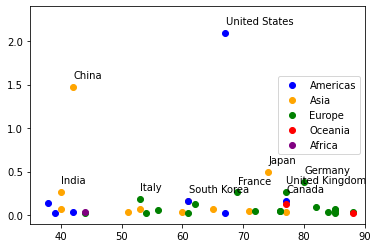

In [53]:
# plot
plt.figure()
for i in range(len(df3)):
    if i<10:
        x=int(df3.loc[i]['CPI_2020'])
        y=int(df3.loc[i]['World_Bank_Estimate'])/10000000
        if df3.loc[i]['Region']=='Americas':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)
        elif df3.loc[i]['Region']=='Asia':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)
        elif df3.loc[i]['Region']=='Europe':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)
        elif df3.loc[i]['Region']=='Oceania':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)
        elif df3.loc[i]['Region']=='Africa':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)

am=df3[df3['Region']=='Americas']
asia=df3[df3['Region']=='Asia']
e=df3[df3['Region']=='Europe']
o=df3[df3['Region']=='Oceania']
af=df3[df3['Region']=='Africa']
am_y=[]
am_x=[]
for i in am['CPI_2020']:
    am_x.append(int(i))
for i in am['World_Bank_Estimate']:
    am_y.append(int(i)/10000000)
plt.scatter(am_x,am_y,c='blue',label='Americas')
asia_y=[]
asia_x=[]
for i in asia['CPI_2020']:
    asia_x.append(int(i))
for i in asia['World_Bank_Estimate']:
    asia_y.append(int(i)/10000000)
plt.scatter(asia_x,asia_y,c='orange',label='Asia')
e_y=[]
e_x=[]
for i in e['CPI_2020']:
    e_x.append(int(i))
for i in e['World_Bank_Estimate']:
    e_y.append(int(i)/10000000)
plt.scatter(e_x,e_y,c='green',label='Europe')
o_y=[]
o_x=[]
for i in o['CPI_2020']:
    o_x.append(int(i))
for i in o['World_Bank_Estimate']:
    o_y.append(int(i)/10000000)
plt.scatter(o_x,o_y,c='red',label='Oceania')
af_y=[]
af_x=[]
for i in af['CPI_2020']:
    af_x.append(int(i))
for i in af['World_Bank_Estimate']:
    af_y.append(int(i)/10000000)
plt.scatter(af_x,af_y,c='purple',label='Africa')
plt.scatter(x,y,c='blue',label='Americas')

plt.xlim([35,90])
plt.ylim([-0.1,2.4])
plt.legend(labels=['Americas','Asia','Europe','Oceania','Africa'],loc='right')

plt.show()